# Finding Heavy Traffic Indicators on I-94

We are going to analyze a dataset about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94). The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

John Hogue made the dataset available that we'll be working with, and you can download it from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

In [1]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the dataset and examine the first and last five rows
df = pd.read_csv('Metro_interstate_Traffic_Volume.csv')
df.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
df.tail(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
# Find more info on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## Analyzing Traffic Volume

The [dataset documentation](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east and west).

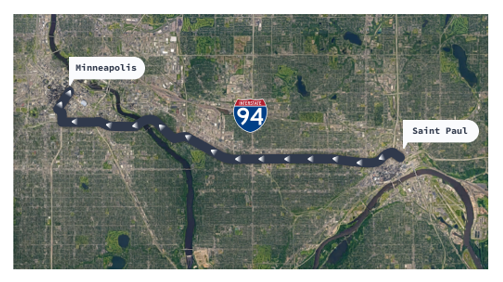

This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway. In the next exercise, we are going to plot a histogram to visualize the distribution of the `traffic_volume` column.

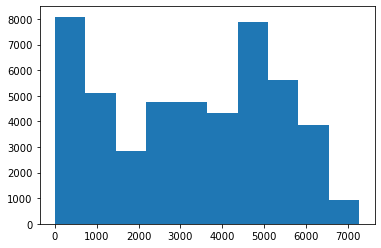

In [5]:
# Plot a historgam to examine the distribution of the traffic_volumn column
plt.hist(x='traffic_volume', data=df)
plt.show()

In [6]:
# Look up a few statistics about the traffic_volume column
df['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

## Traffic Volume: Day vs. Night

Based on the results above, there are as few as zero traffic and as many as 7,280 cars between 2012-10-02 09:00:00 and 2018-09-30 23:00:00. 

About 25% of the time, there were 1,193 cars or fewer passing the station each hour. About 75% of the time, the traffic volume was 4,933 cars or fewer. Thus, the remaining 25% of the time, the traffic volume exceeded 4,933 cars.

In general, daytime and nighttime influence the traffic volume. Most people go to work in the morning and go home in the evening. We are going to compare the traffic between daytime and nighttime.

Thus, we'll start by dividing the dataset into two parts:
- Daytime data: hours from 7 AM to 7 PM (12 hours)
- Nighttime data: hours from 7 PM to 7 AM (12 hours)

While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

In [7]:
# Transform the date_time column to datetime format
df['date_time'] = pd.to_datetime(df['date_time'])

In [8]:
# Get the hour of every instance of the date_time column and isolate between the daytime and the nightime data
day = df.copy()[(df['date_time'].dt.hour >= 7) & (df['date_time'].dt.hour < 19)]
night = df.copy()[(df['date_time'].dt.hour >= 19) | (df['date_time'].dt.hour < 7)] # The sign is | (or) because there is no number that is both more than or equal to 19 AND less than 7

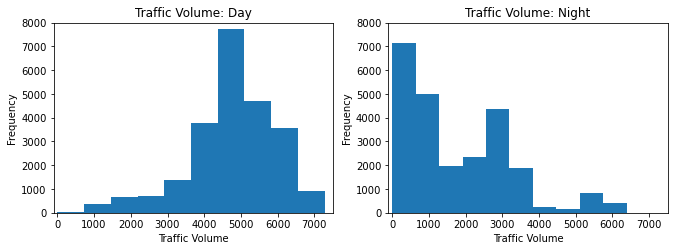

In [9]:
# Plot the histograms of traffic_volume for both day and night
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

In [10]:
# Look up a few statistics for both day and night
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [11]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

During the day, 75% of the time the traffic was higher than 4,252 cars. On the other hand, during the night, most of the time the traffic was less than the traffic during the day. Since our goal is to find the heavy traffic, we are going to focus only on daytime.

## Time Indicators

One of the possible indicators of heavy traffic is time.  There might be more people on the road in a certain month, on a certain day, or at a certain time of the day. Therefore, we are going to look at a few line plots showing how the traffic volume changed according to the following parameters:

- Month
- Day of the week
- Time of day

In [12]:
# Create a new column named 'month' and groupby to know the average daily traffic in a month
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

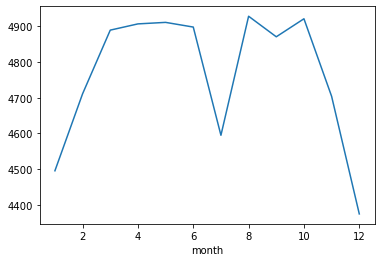

In [13]:
# Create a line plot
by_month['traffic_volume'].plot()
plt.show()

In December, traffic is less likely to be heavy due to cold weather. However, what's up with July? We are going to examine the July month.

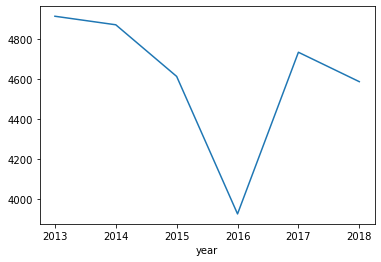

In [14]:
# Create the year column and groupby it
day['year'] = day['date_time'].dt.year
july_year = day[day['month'] == 7]
groupby_july = july_year.groupby('year').mean()
groupby_july['traffic_volume'].plot() # Plotting the traffic volume based on year
plt.show()

So, we can see that there is an anomaly in 2016. [This article from 2016](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696) suggests that there were road closures, thus it helps explain the anomaly. For now, we'll continue with building line plots for another time unit: day of the week.

In [15]:
# Averaging traffic volume for each day of the week
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

<AxesSubplot:xlabel='dayofweek'>

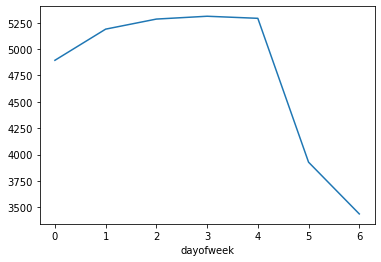

In [16]:
# PLotting the dayofweek
by_dayofweek['traffic_volume'].plot()

The traffic volume was a lot less in Saturday (5) and Sunday (6) than any business days. Now, we'll generate a line plot for the time of day. Since the weekends will drag down the average values, we are going to look at the averages separately. We'll split the data based on the day type: business day or weekend.

In [17]:
day['hour'] = day['date_time'].dt.hour
business_days = day.copy()[day['dayofweek'] <= 4] # 4 is Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 is Saturday
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


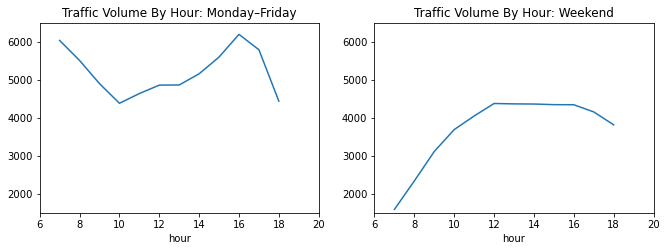

In [18]:
# Plot two line plots on a grid chart
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Monday–Friday')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Weekend')

plt.show()

During the business days, rush hours were at 7AM and around 4PM. This is likely because people go to work and to home during those hours. Meanwhile, people tend to enjoy a slow morning during the weekends.

To conclude, we found that 1) the traffic is usually heavier during warm months than cold months, 2) traffic is heavier during business days than weekends, and 3) 7AM and 4PM are the rush hours.

## Weather Indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.

In [19]:
# Find the correlation values between traffic_volume and the numerical weather columns
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

`temp` shows the strongest correlation with `traffic_volume`. This proves our findings that warm months tend to have heavier traffic than cold months. On the other hand, `rain_1h` and `snow_1h` only have weak correlation with `traffic_volume`. Let's plot a scatter plot between `temp` and `traffic_volume`.

(230.0, 320.0)

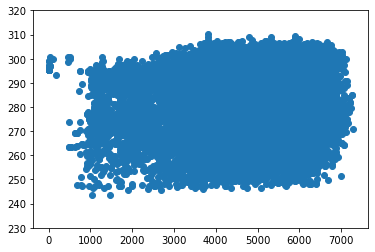

In [20]:
# Plot a scatter plot
plt.scatter(x='traffic_volume',y='temp',data=day)
plt.ylim(230,320)

This doesn't seem like a reliable indicator for heavy traffic.

To see if we can find more useful data, we'll look next at the categorical weather-related columns: `weather_main` and `weather_description`. We are going to calculate the average traffic volume associated with each unique value in these two columns.

In [21]:
# Groupby based on those two columns
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

<AxesSubplot:ylabel='weather_main'>

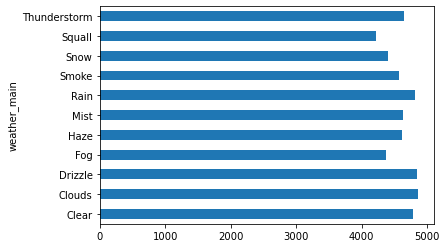

In [22]:
by_weather_main['traffic_volume'].plot.barh()

No, there are no traffic volume exceeding 5,000 cars. We could not really find any traffic indicator.

<AxesSubplot:ylabel='weather_description'>

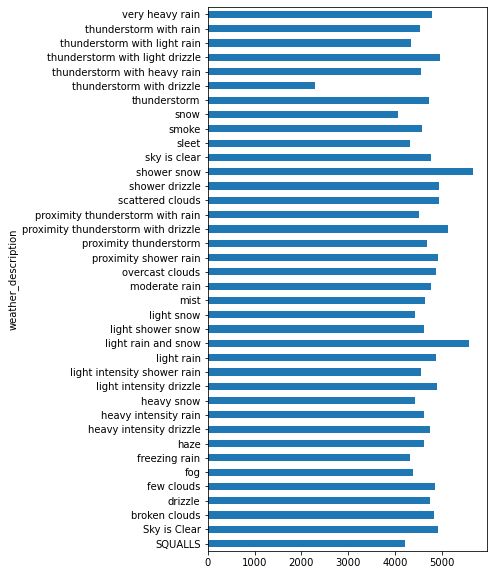

In [23]:
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))

Shower snow, light rain and snow, and proximity thunderstorm with drizzle exceed 5,000 cars. Why, then, the Sky is Clear weather does not have the heaviest traffic volume? There might be several possible explainations. Perhaps, during a clear day, people will choose to use public transportation, which will reduce traffic. However, in a light rain or snow, people will be inclined to use private cars.

## Conclusion

In this project, we managed to find a few indicators of heavy traffic on I-94:
By time indicator...
- Warm months generally have heavier traffic than cold months
- Business days have heavier traffic than weekends
- During business days, 7AM and 4PM are rush hours

By weather description:
- Shower snow
- Light rain and snow
- Proximity Thunderstorm